<a href="https://colab.research.google.com/github/darshan468/Handwritten-Digit-Recognizer/blob/main/Handwritten_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 - 70s - 166ms/step - accuracy: 0.9028 - loss: 0.3165 - val_accuracy: 0.9803 - val_loss: 0.0673
Epoch 2/10
422/422 - 41s - 96ms/step - accuracy: 0.9699 - loss: 0.1019 - val_accuracy: 0.9873 - val_loss: 0.0473
Epoch 3/10
422/422 - 41s - 97ms/step - accuracy: 0.9784 - loss: 0.0739 - val_accuracy: 0.9890 - val_loss: 0.0380
Epoch 4/10
422/422 - 41s - 97ms/step - accuracy: 0.9821 - loss: 0.0592 - val_accuracy: 0.9888 - val_loss: 0.0399
Epoch 5/10
422/422 - 41s - 97ms/step - accuracy: 0.9840 - loss: 0.0540 - val_accuracy: 0.9912 - val_loss: 0.0342
Epoch 6/10
422/422 - 43s - 101ms/step - accuracy: 0.9856 - loss: 0.0476 - val_accuracy: 0.9905 - val_loss: 0.0322
Epoch 7/10
422/422 - 80s - 190ms/step - accuracy: 0.9876 - loss: 0.0400 - val_accuracy: 0.9922 - val_loss: 0.0309
Epoch 8/10
422/422 - 41s - 97ms/step - accuracy: 0.9893 - loss: 0.0358 - val_accuracy: 0.9930 - val_loss: 0.0310
Epoch 9/10
422/422 - 41s - 97ms/step - accuracy: 0.9906 - loss: 0.0320 - val_accuracy: 0.9913

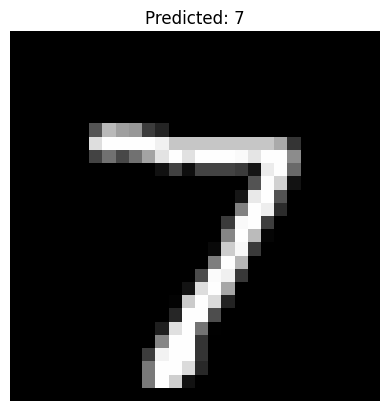

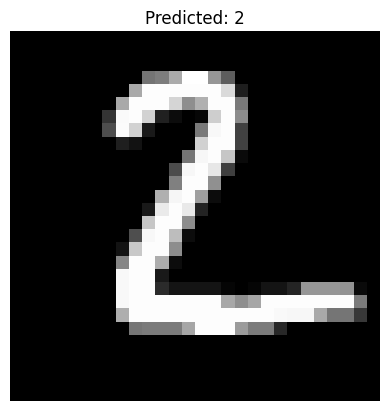

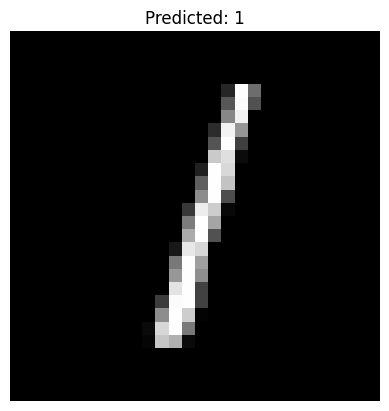

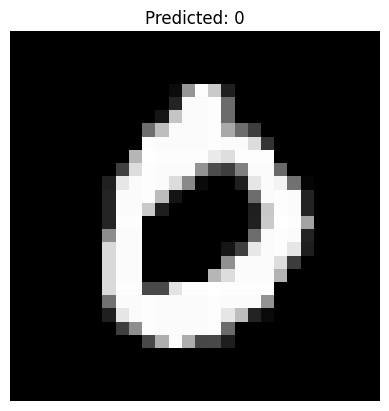

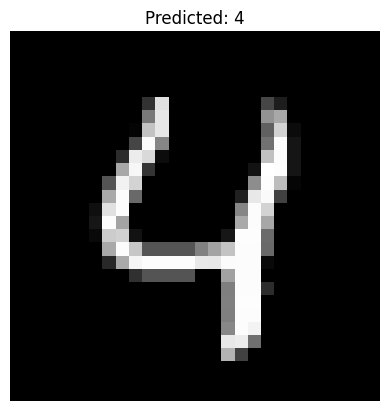

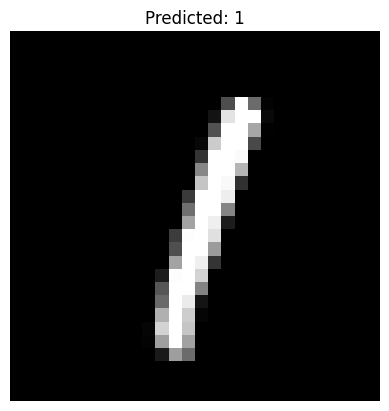

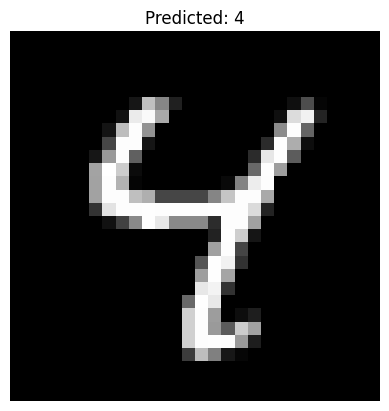

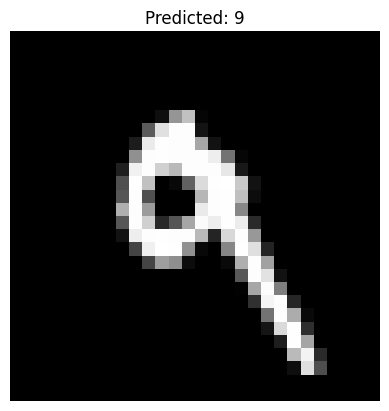

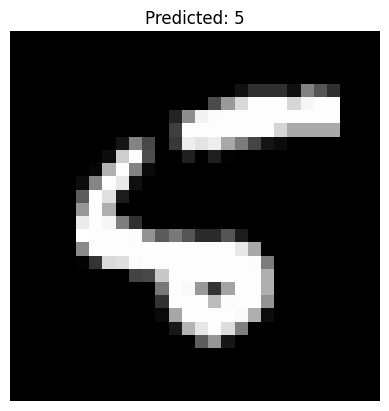

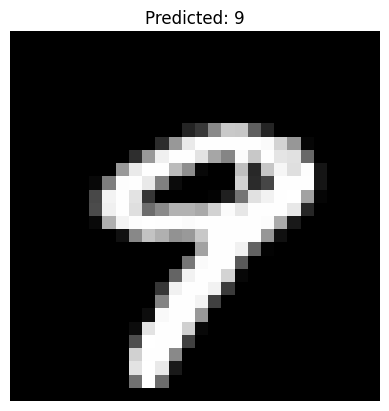

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encoding of labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=128,
                    verbose=2)

# 6. Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 7. Predict and visualize some results
predictions = model.predict(x_test[:10])

for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()
